Dataset Loaded
Using Sample Size: (50000, 23)

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9941
           1       0.16      0.63      0.26        59

    accuracy                           0.98     10000
   macro avg       0.58      0.80      0.62     10000
weighted avg       0.99      0.98      0.98     10000



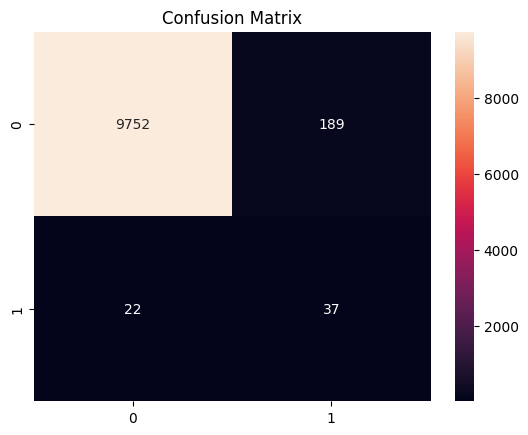

In [ ]:

import numpy as np
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data_path = "/kaggle/input"
file_path = None

for dirname, _, filenames in os.walk(data_path):
    for filename in filenames:
        if filename.endswith(".csv"):
            file_path = os.path.join(dirname, filename)

df = pd.read_csv(file_path)

print("Dataset Loaded")


df = df.sample(n=50000, random_state=42)  # reduce size
print("Using Sample Size:", df.shape)



target_col = "is_fraud"

numeric_df = df.select_dtypes(include=np.number)

X = numeric_df.drop(target_col, axis=1)
y = numeric_df[target_col]


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)



model = RandomForestClassifier(
    n_estimators=30,        
    max_depth=10,           
    n_jobs=-1,             
    class_weight="balanced",
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))



cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()


In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=500,
    class_weight="balanced",
    n_jobs=-1
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9941
           1       0.00      0.00      0.00        59

    accuracy                           0.99     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.99      0.99      0.99     10000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
